### Finding best markets for advertisement in e-learning

### About Project

In this project we will be combining some of the skills such as 

- summarizing distributions using the range, median & mode
- measurement of the variability of a distribution using the range, the mean absolute deviation, variance and standard deviation
- Locate any value in a distribution using z-scores

These skills will be used to perform practical data analysis along with what we learnt on the course on statistics fundamentals.

### Project Goal

We are working for an e-learning company that offers courses on 

- programming
- web & mobile development
- data science
- game development


In order to promote our products we'd be finding two best markets to invest money in advertisement.

### Import Libraries

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

### Function

In [2]:
def create_box_plot(y, x, roles_df):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
    sns.boxplot(y=y, x=x, data = roles_df)
    ax.set_ylabel("Money per month (US dollars)") 
    ax.set_xlabel("Country")
    ax.set_title("Money Spent Per Month Per Country\n(Distributions)", fontsize = 16)
    ax.set_xticks(range(4), ['US', 'UK', 'India', 'Canada'])
    plt.show()  

In [3]:
# Read in the '2017-fCC-New-Coders-Survey-Data.csv' file and explore briefly the data set.

fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=0)

# Look for number of rows and columns.

print(fcc.shape)

# Print the first five rows.

pd.options.display.max_columns = 150
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

### Understanding the data

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/)

- We use Ready-made dataset because of easy availability and cost efficiency compared to a survey.

- This data set describes a survey from [freeCodeCamp](https://www.freecodecamp.org/), a free e-leaning website which attracted 400,000 coders of varying interests.

- The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [4]:
# Figure out whether the sample we have is representative for our population of interest.

# The JobRoleInterest column describes for every participant the role(s) they'd be interested in working.
    
# Generate a frequency distribution table for this column. Take percentages instead of absolute frequencies.
    
fcc['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                      11.770595
  Front-End Web Developer                                                                                                                      6.435927
  Data Scientist                                                                                                                               2.173913
Back-End Web Developer                                                                                                                         2.030892
  Mobile Developer                                                                                                                             1.673341
                                                                                                                                                ...    
  Data Scientist, Full-Stack Web Developer,   Mobile Developer, Information Security, Ba

### Analysis

Many people are interested in web-development (Full-Stack Web Developer & Front-End Web Developer) while a few people are interested in data-science, back-end web development and mobile development. There are also those who are interested in domains other than web and mobile development.

By isolating the number of people who are interested in a single subject from the ones with mixed interests, we can determine the representative sample.

In [5]:
interests_no_nulls = fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

About 31.7% of the population have an idea about the niche they'd like to work in, while a vast majority of students have mixed interests. A vast majority of the students have mixed interests, this is a good sign for our study.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


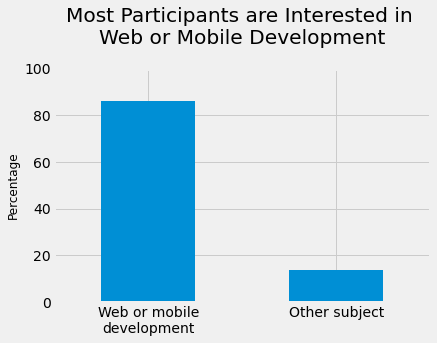

In [6]:
# Generate at least one graph while you're working on these steps to help the reader understand easier what you're doing.

web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

plt.style.use('fivethirtyeight')
freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',y = 1.08)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],rotation = 0)
plt.ylim([0,100])
plt.show()

- 86% of the people are interested in either web or mobile development and this sample can be considered for this study
- To figure out the best markets to invest money for advertising our courses, the following information is needed.
    - Location of these coders
    - Locations with greatest number of new coders
    - Money they are willing ro invest on learning

In [7]:
# drop all the rows where participants didn't answer what role they are interested in
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Generate a frequency table for the CountryLive variable.

# Generate both absolute and relative frequencies.
    
absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize = True) * 100

pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 'Percentage': relative_frequencies})

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Kyrgyzstan,1,0.014624
Nicaragua,1,0.014624
Guadeloupe,1,0.014624
Guatemala,1,0.014624


### Analysis

Based on the results, US has the highest percentage of participants with 45.7% while India had 7.7% of the participants, United Kingdom had 4.6% of the participants and Canada had 3.8% of the participants.

We can stick to the four markets of United States of America, India, United Kingdom and Canada instead of two as we see the potential of investment in them.

We need to go more in depth to figure out whether people are willing to learn for free or spend money on learning.

In [8]:
# Create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).

# You'll need to divide the MoneyForLearning column to the MonthsProgramming column.
    
# Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.

fcc_good['MonthsProgramming'].replace(0,1,inplace=True)    
fcc_good['money_per_month'] = fcc_good['MoneyForLearning']/fcc_good['MonthsProgramming']    

In [9]:
# Find out how many null values there are in the new column (the column describing the amount of money students spend per month).

fcc_good['money_per_month'].isnull().sum()

675

In [10]:
# Keep only the rows that don't have a null value for the new column.

fcc_good = fcc_good[fcc_good['money_per_month'].notna()]

In [11]:
# Remove also any rows that have null values in the CountryLive column.

fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

In [12]:
# Group the remaining data by the CountryLive column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

# You can use the DataFrame.groupby() method.
    
# As a summary metric, we recommend choosing the mean to take into account all values in the distributions. You can also compute the median or the mode to see how they compare with the mean.
    
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America','India','United Kingdom','Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

### Analysis

The results for United Kingdom and Canada are a bit surprising relative to the values we see for India. We'd expect people in UK and Canada to spend more on learning than people in India. The reasons attributed for this could be due to.

 - Less representative data for United Kingdom and Canada
 - Presence of outliers making the mean too large for India and low for UK and Canada

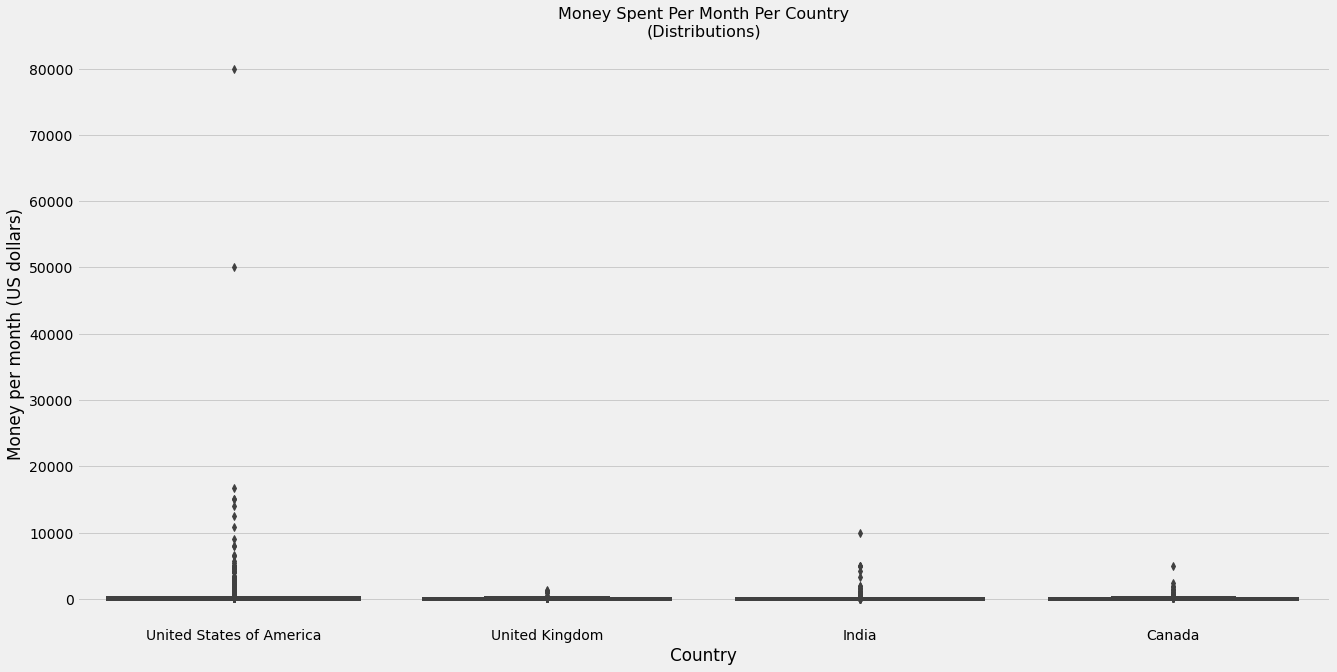

In [13]:
# Generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.

only_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

create_box_plot('money_per_month', 'CountryLive', only_4)

### Analysis

- There aren't outliers for India, Canada or the United Kingdom

- But on the other hand there are two outliers for the United States at 50000 and 80000

In [14]:
# Eliminate the extreme outliers.

fcc_good = fcc_good[fcc_good['money_per_month'] < 20000] # Here we'll remove every value that goes over $20,000 per month.

In [15]:
# Recompute the mean values, just like we did in the previous screen: group the data by the CountryLive column, and then find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada

countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom','Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

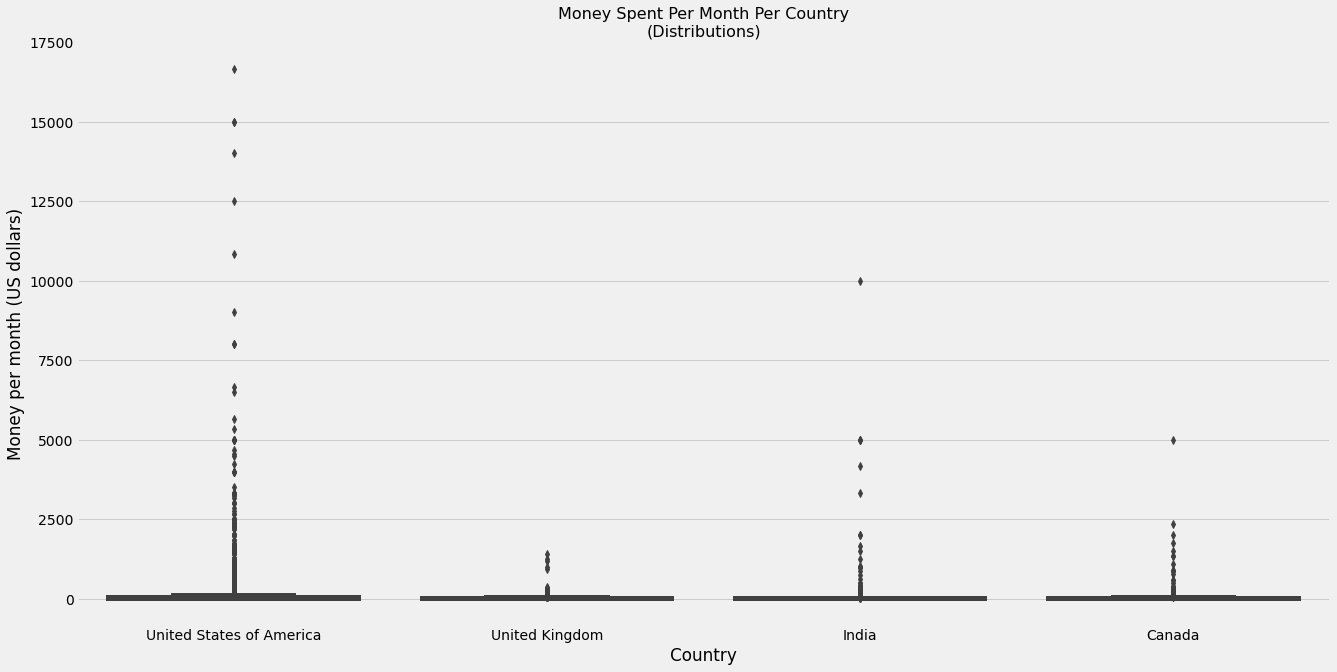

In [16]:
only_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

create_box_plot('money_per_month', 'CountryLive', only_4)

We can find a couple of persons in India who spend $5000 per month. To justify these big expenses with learning, it could be implied that they attended bootcamp, which might justify the large amount of money spent.

In [17]:
# Isolate these respondents and examine their answers to other questions in the survey

india_outliers = only_4[(only_4['CountryLive'] == 'India') & (only_4['money_per_month'] >= 2500)]
us_outliers = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['money_per_month'] >= 6000)]
canada_outliers = only_4[(only_4['CountryLive'] == 'Canada') & (only_4['money_per_month'] > 4500)]

- For India, neither participant attended any bootcamp. The respondents might have misinterpreted this question as fee along with university tuition. Thus, these rows can be removed.
- For the United States out of 11 outliers, 6 people attended bootcamps. We'll remove those rows where participants spent 6000 dollars a month  and didn't attend bootcamp. We'll also remove respondents that didn't attend bootcamps and have been programming for 3 months or less.
- For Canada, there is a person who had spent roughly 5000 dollars per month. 

In [18]:
# If you find more extreme outliers, remove them, and recompute the mean values.

# India

only_4 = only_4.drop(india_outliers.index)

# United States

no_bootcamp = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['money_per_month'] >= 6000) & (only_4['AttendedBootcamp'] == 0)]
only_4 = only_4.drop(no_bootcamp.index)
less_than_3_months = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['money_per_month'] >= 6000) & (only_4['MonthsProgramming'] <= 3)]
only_4 = only_4.drop(less_than_3_months.index)

# Canada

only_4 = only_4.drop(canada_outliers.index)

# Recomputation of the mean values

only_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

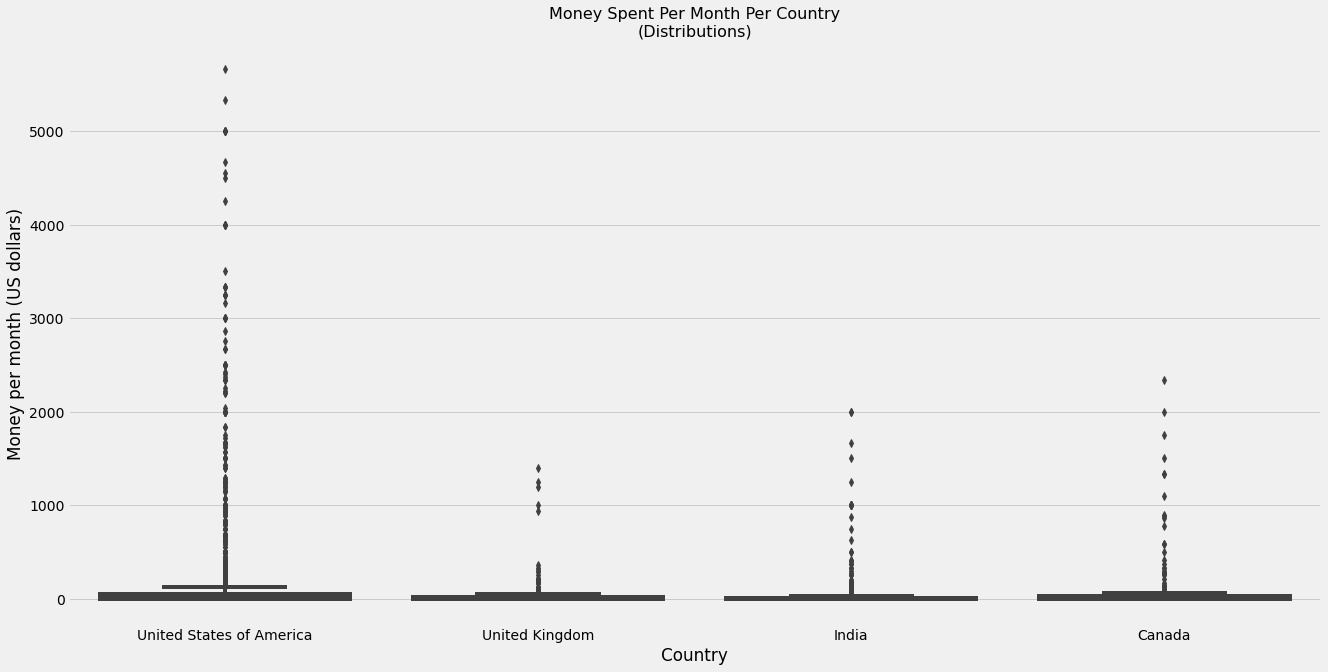

In [19]:
# Visualization of the distribution

create_box_plot('money_per_month', 'CountryLive', only_4)

### Analysis

- The United States remains as the best option to advertise as the coders are willing to pay 143 dollars a month.
- Canada remains the second best option as the people are willing to pay 93 dollars a month.
- India and the United Kingdom remain as the third and fourth best options with 66 dollars and 45 dollars respectively.

In [20]:
only_4['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

### Choice of markets

As Canada remains the second best choice if we sell our subscription at 59 dollars a month , we also have India where people are willing to pay 66 dollars a month. We also need to consider the fact that there are more customers when compared to Canada.

Though Canada seems an ideal choice considering the fee people are willing to pay, due to the number of potential customers and people willing to pay the requisite fee as described above.

### Conclusions

There are two ways as to go about the advertisement.

- Advertise in US, Canada and India
- Advertise either in US and India or US and Canada

Also we can either split the budget into 70% in the US and 30% in India or 65% in the US and 35 % in Canada. If three countries are chosen for advertisement we can split the budget into 50% in the US, 30% in India and 20% in Canada.

It also makes sense to advertise only in the US but potential opportunities of advertisement in India and Canada are foregone in the process.

The best decision would be to send the results to the marketing team who can use their domain knowledge to take a decision with their expertise.